# Wine Quality Prediction Analysis.




## Dataset Information

The datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods. Two datasets were combined and few values were randomly removed.

##### Attribute Information:
Input variables (based on physicochemical tests): \
1 - fixed acidity \
2 - volatile acidity \
3 - citric acid \
4 - residual sugar \
5 - chlorides \
6 - free sulfur dioxide \
7 - total sulfur dioxide \
8 - density \
9 - pH \
10 - sulphates \
11 - alcohol \
Output variable (based on sensory data): \
12 - quality (score between 0 and 10) \



## Importing Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## Loading the Datasets

In [2]:
df=pd.read_csv('winequality.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10185,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
10186,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
10187,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
10188,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Summary of the DataFrame

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10190 entries, 0 to 10189
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  10190 non-null  object 
 1   fixed acidity         10174 non-null  float64
 2   volatile acidity      10179 non-null  float64
 3   citric acid           10184 non-null  float64
 4   residual sugar        10188 non-null  float64
 5   chlorides             10188 non-null  float64
 6   free sulfur dioxide   10190 non-null  float64
 7   total sulfur dioxide  10190 non-null  float64
 8   density               10190 non-null  float64
 9   pH                    10175 non-null  float64
 10  sulphates             10180 non-null  float64
 11  alcohol               10190 non-null  float64
 12  quality               10190 non-null  int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 1.0+ MB


## Statistical info

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,10174.000000,10179.000000,10184.000000,10188.000000,10188.000000,10190.000000,10190.000000,10190.000000,10175.000000,10180.000000,10190.000000,10190.000000
mean,7.563697,0.407798,0.296830,4.383333,0.066756,25.303337,90.145191,0.995356,3.254511,0.573116,10.497584,5.756330
std,1.504952,0.192917,0.164068,4.140712,0.040691,17.015686,59.769701,0.002786,0.165078,0.161029,1.148817,0.855433
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.600000,0.260000,0.200000,1.900000,0.043000,12.000000,35.000000,0.993480,3.140000,0.460000,9.500000,5.000000
50%,7.200000,0.360000,0.300000,2.400000,0.060000,22.000000,86.000000,0.995700,3.250000,0.550000,10.300000,6.000000
75%,8.200000,0.540000,0.400000,5.600000,0.080000,35.000000,134.000000,0.997300,3.360000,0.650000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## checking for null values

In [5]:
df.isnull().sum()

type                     0
fixed acidity           16
volatile acidity        11
citric acid              6
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                      15
sulphates               10
alcohol                  0
quality                  0
dtype: int64

## filling the missing values

In [6]:
for col, value in df.items():
    if col != 'type':
        df[col] = df[col].fillna(df[col].mean())

In [7]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Exploratory Data Analysis

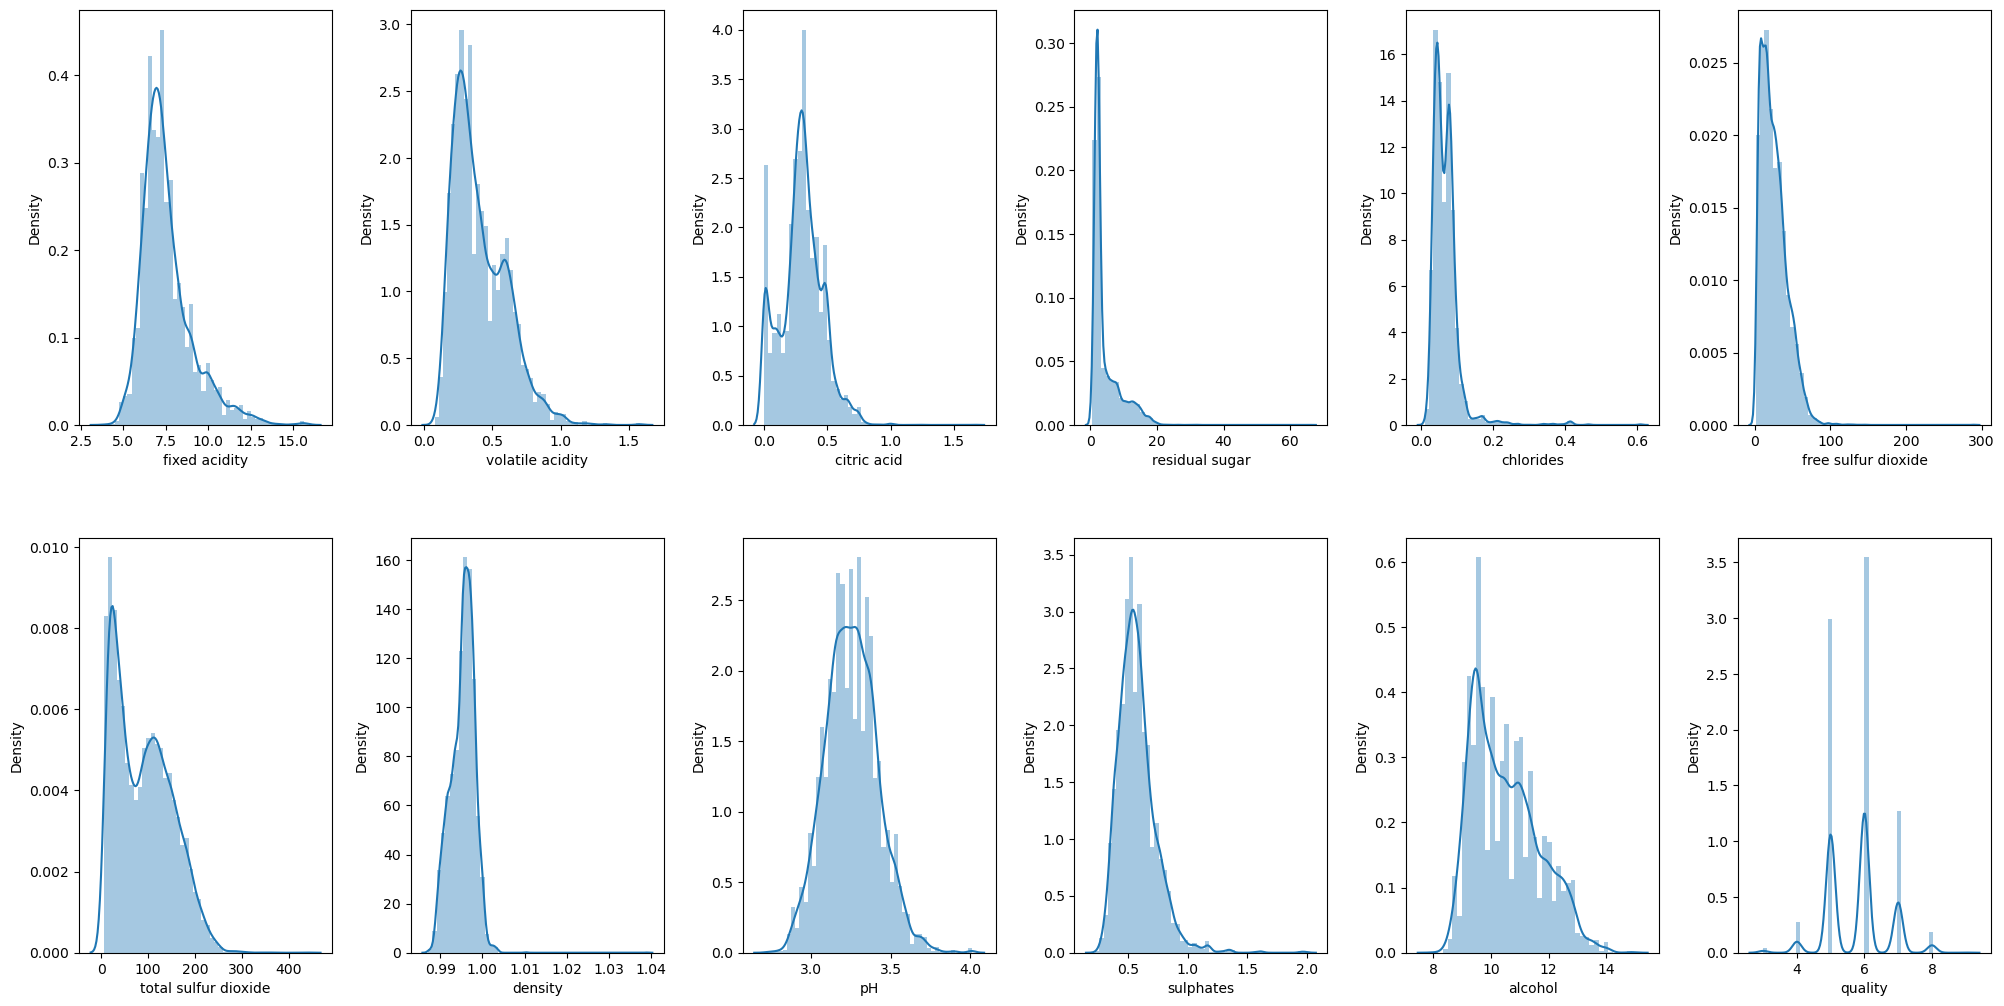

In [8]:
# create dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [9]:
# log transformation
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])

<Axes: xlabel='free sulfur dioxide', ylabel='Density'>

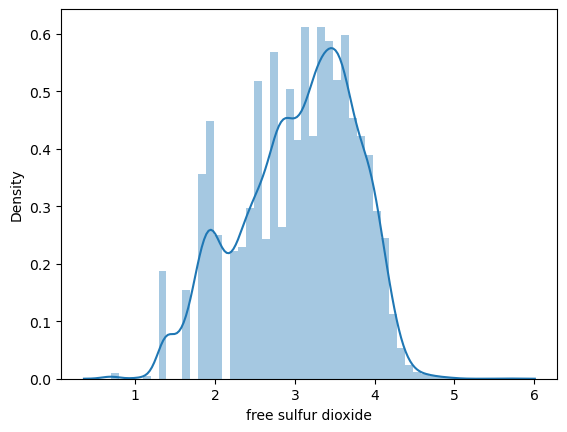

In [10]:
sns.distplot(df['free sulfur dioxide'])

<Axes: xlabel='quality', ylabel='count'>

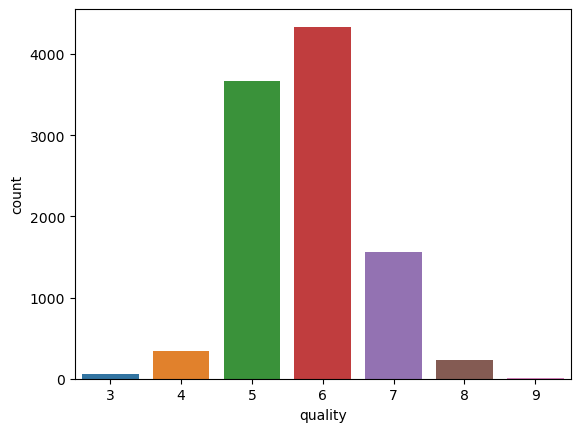

In [11]:
sns.countplot(data=df,x='quality')

<Axes: xlabel='type', ylabel='count'>

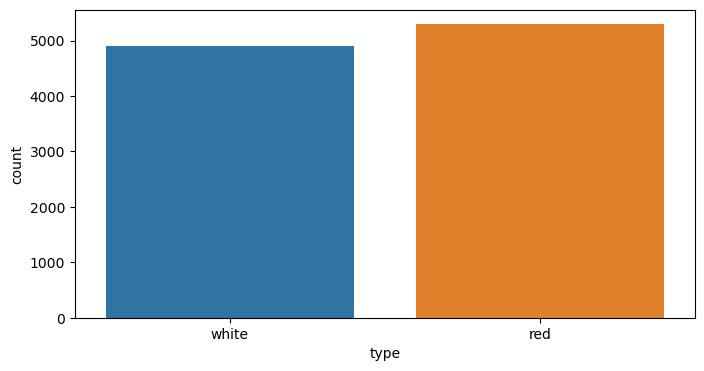

In [12]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='type')

In [13]:
df.columns


Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

## Finding Outliers 

Text(0.5, 1.0, 'Box Plot of All Columns')

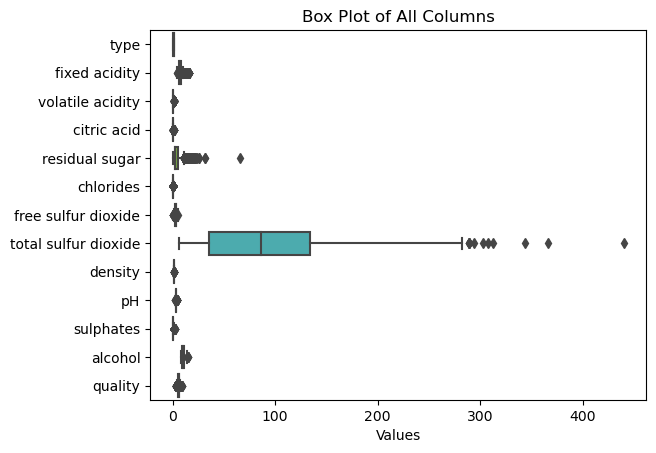

In [51]:
c=['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']
sns.boxplot(data=df[c], orient='h') 
plt.xlabel('Values')
plt.title('Box Plot of All Columns')

# Removing outliers

In [52]:
c=['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']

for i in c:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    upperL=q3+1.5*iqr
    lowerL=q1-1.5*iqr
    df[i]=np.where(df[i]>upperL,upperL,np.where(df[i]<lowerL,lowerL,df[i]))

Text(0.5, 1.0, 'Box Plot of All Columns')

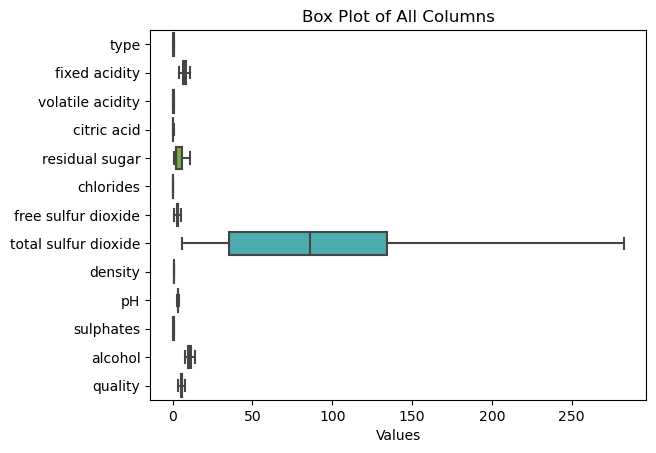

In [53]:
#After removing outliers
c=['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']

sns.boxplot(data=df[c], orient='h')  # 'orient' is set to 'h' for horizontal box plots
plt.xlabel('Values')
plt.title('Box Plot of All Columns')

## Encoding For type Column

In [16]:
df["type"]=df["type"].replace({"white":0,"red":1})

##   Seperation of Target Column(x) And Feature Column(y)

In [17]:
x=df.iloc[:,:-1]
y=df['quality']

In [18]:
x

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,7.0,0.270,0.36,20.7,0.045,3.828641,170.0,1.00100,3.00,0.450000,8.8
1,0,6.3,0.300,0.34,1.6,0.049,2.708050,132.0,0.99400,3.30,0.490000,9.5
2,0,8.1,0.280,0.40,6.9,0.050,3.433987,97.0,0.99510,3.26,0.440000,10.1
3,0,7.2,0.230,0.32,8.5,0.058,3.871201,186.0,0.99560,3.19,0.400000,9.9
4,0,7.2,0.230,0.32,8.5,0.058,3.871201,186.0,0.99560,3.19,0.400000,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
10185,1,6.2,0.600,0.08,2.0,0.090,3.496508,44.0,0.99490,3.45,0.580000,10.5
10186,1,5.9,0.550,0.10,2.2,0.062,3.688879,51.0,0.99512,3.52,0.573116,11.2
10187,1,6.3,0.510,0.13,2.3,0.076,3.401197,40.0,0.99574,3.42,0.750000,11.0
10188,1,5.9,0.645,0.12,2.0,0.075,3.496508,44.0,0.99547,3.57,0.710000,10.2


In [19]:
y

0        6
1        6
2        6
3        6
4        6
        ..
10185    5
10186    6
10187    6
10188    5
10189    6
Name: quality, Length: 10190, dtype: int64

## Class Imbalancement

In [91]:
import imblearn
from imblearn.over_sampling import SMOTE
oversample=SMOTE(k_neighbors=4)
x,y=oversample.fit_resample(x, y)
y.value_counts()
 

quality
6    4335
5    4335
7    4335
8    4335
4    4335
3    4335
9    4335
Name: count, dtype: int64

##  Scaling Using MinMax Scaler

In [63]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30345 entries, 0 to 30344
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       30345 non-null  float64
 1   1       30345 non-null  float64
 2   2       30345 non-null  float64
 3   3       30345 non-null  float64
 4   4       30345 non-null  float64
 5   5       30345 non-null  float64
 6   6       30345 non-null  float64
 7   7       30345 non-null  float64
 8   8       30345 non-null  float64
 9   9       30345 non-null  float64
 10  10      30345 non-null  float64
 11  11      30345 non-null  float64
dtypes: float64(12)
memory usage: 2.8 MB


## Train_Test_split:

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

## Model Building

In [65]:
logreg=LogisticRegression()
knn=KNeighborsClassifier()
svc=SVC()
dt=DecisionTreeClassifier()

## Logistic Regression

In [66]:
#creating Function for all model
def mymodel(model):
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    print(classification_report(y_test,ypred))
    return model

In [67]:
mymodel(logreg)

              precision    recall  f1-score   support

           3       0.57      0.58      0.58      1100
           4       0.48      0.45      0.46      1088
           5       0.45      0.50      0.47      1095
           6       0.36      0.25      0.30      1091
           7       0.40      0.36      0.38      1045
           8       0.46      0.48      0.47      1096
           9       0.76      1.00      0.86      1072

    accuracy                           0.52      7587
   macro avg       0.50      0.52      0.50      7587
weighted avg       0.50      0.52      0.50      7587



LogisticRegression()

In [68]:
logreg1=LogisticRegression(max_iter=1000)
logreg1

LogisticRegression(max_iter=1000)

In [69]:
logreg1.fit(x_train, y_train)
y_pred1 = logreg1.predict(x_test)
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           3       0.58      0.59      0.58      1100
           4       0.48      0.45      0.46      1088
           5       0.45      0.50      0.48      1095
           6       0.37      0.25      0.30      1091
           7       0.40      0.36      0.37      1045
           8       0.46      0.49      0.47      1096
           9       0.76      1.00      0.87      1072

    accuracy                           0.52      7587
   macro avg       0.50      0.52      0.51      7587
weighted avg       0.50      0.52      0.51      7587



In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}

logreg11 = LogisticRegression()
grid_search = GridSearchCV(logreg11, param_grid, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_logreg = grid_search.best_estimator_

y_pred2 = best_logreg.predict(x_test)
print(classification_report(y_test, y_pred2))


Fitting 5 folds for each of 300 candidates, totalling 1500 fits
              precision    recall  f1-score   support

           3       0.57      0.60      0.58      1100
           4       0.49      0.47      0.48      1088
           5       0.45      0.48      0.46      1095
           6       0.38      0.28      0.32      1091
           7       0.39      0.35      0.37      1045
           8       0.48      0.58      0.53      1096
           9       0.93      1.00      0.96      1072

    accuracy                           0.54      7587
   macro avg       0.53      0.54      0.53      7587
weighted avg       0.53      0.54      0.53      7587



## Bagging with Logistic Regression

In [71]:
from sklearn.ensemble import BaggingClassifier

In [72]:
bg=BaggingClassifier(LogisticRegression())
bg.fit(x_train,y_train)
ypred=bg.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           3       0.57      0.58      0.58      1100
           4       0.48      0.45      0.47      1088
           5       0.45      0.50      0.47      1095
           6       0.37      0.25      0.30      1091
           7       0.41      0.36      0.38      1045
           8       0.46      0.48      0.47      1096
           9       0.76      1.00      0.86      1072

    accuracy                           0.52      7587
   macro avg       0.50      0.52      0.51      7587
weighted avg       0.50      0.52      0.51      7587



## KNN Algorithm

In [73]:
mymodel(knn)

              precision    recall  f1-score   support

           3       0.95      1.00      0.97      1100
           4       0.87      0.97      0.92      1088
           5       0.80      0.72      0.76      1095
           6       0.75      0.56      0.64      1091
           7       0.79      0.86      0.82      1045
           8       0.88      0.97      0.92      1096
           9       0.99      1.00      1.00      1072

    accuracy                           0.87      7587
   macro avg       0.86      0.87      0.86      7587
weighted avg       0.86      0.87      0.86      7587



KNeighborsClassifier()

In [74]:
x_train=np.array(x_train)
x_test=np.array(x_test)
model=KNeighborsClassifier(n_neighbors=8)     
model

KNeighborsClassifier(n_neighbors=8)

In [75]:
model.fit(x_train, y_train)
y_pred4=model.predict(x_test)
print(classification_report(y_test, y_pred4))


              precision    recall  f1-score   support

           3       0.94      1.00      0.97      1100
           4       0.84      0.97      0.90      1088
           5       0.76      0.68      0.72      1095
           6       0.70      0.46      0.55      1091
           7       0.74      0.82      0.78      1045
           8       0.86      0.97      0.91      1096
           9       0.99      1.00      1.00      1072

    accuracy                           0.84      7587
   macro avg       0.83      0.84      0.83      7587
weighted avg       0.83      0.84      0.83      7587



In [76]:
#Bagging with knn
knn=BaggingClassifier(KNeighborsClassifier())
bg.fit(x_train,y_train)
ypred=bg.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           3       0.57      0.58      0.58      1100
           4       0.48      0.45      0.46      1088
           5       0.45      0.50      0.47      1095
           6       0.36      0.25      0.29      1091
           7       0.41      0.36      0.38      1045
           8       0.46      0.48      0.47      1096
           9       0.76      1.00      0.86      1072

    accuracy                           0.52      7587
   macro avg       0.50      0.52      0.50      7587
weighted avg       0.50      0.52      0.50      7587



## Support Vector Machine

In [77]:
#SVM
mymodel(svc)

              precision    recall  f1-score   support

           3       0.87      0.84      0.86      1100
           4       0.67      0.67      0.67      1088
           5       0.54      0.58      0.56      1095
           6       0.42      0.29      0.34      1091
           7       0.47      0.46      0.46      1045
           8       0.59      0.72      0.65      1096
           9       0.94      1.00      0.97      1072

    accuracy                           0.65      7587
   macro avg       0.64      0.65      0.64      7587
weighted avg       0.64      0.65      0.65      7587



SVC()

In [78]:
model3=SVC()
model3

SVC()

In [79]:
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
print(classification_report(y_test, y_pred3))


              precision    recall  f1-score   support

           3       0.87      0.84      0.86      1100
           4       0.67      0.67      0.67      1088
           5       0.54      0.58      0.56      1095
           6       0.42      0.29      0.34      1091
           7       0.47      0.46      0.46      1045
           8       0.59      0.72      0.65      1096
           9       0.94      1.00      0.97      1072

    accuracy                           0.65      7587
   macro avg       0.64      0.65      0.64      7587
weighted avg       0.64      0.65      0.65      7587



## Decision Tree

In [80]:
mymodel(dt)

              precision    recall  f1-score   support

           3       0.99      0.98      0.98      1100
           4       0.93      0.90      0.92      1088
           5       0.84      0.82      0.83      1095
           6       0.77      0.78      0.77      1091
           7       0.84      0.84      0.84      1045
           8       0.90      0.93      0.92      1096
           9       1.00      1.00      1.00      1072

    accuracy                           0.89      7587
   macro avg       0.89      0.89      0.89      7587
weighted avg       0.89      0.89      0.89      7587



DecisionTreeClassifier()

In [81]:
model2=DecisionTreeClassifier()
model2

DecisionTreeClassifier()

In [82]:
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print(classification_report(y_test, y_pred2))


              precision    recall  f1-score   support

           3       0.98      0.98      0.98      1100
           4       0.94      0.91      0.92      1088
           5       0.83      0.82      0.83      1095
           6       0.78      0.79      0.79      1091
           7       0.84      0.84      0.84      1045
           8       0.91      0.94      0.92      1096
           9       1.00      1.00      1.00      1072

    accuracy                           0.90      7587
   macro avg       0.90      0.90      0.90      7587
weighted avg       0.90      0.90      0.90      7587



## Random Forest

In [83]:
#RandomForest Algorithm
model3=RandomForestClassifier()
model3

RandomForestClassifier()

In [84]:
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
print(classification_report(y_test, y_pred3))


              precision    recall  f1-score   support

           3       1.00      1.00      1.00      1100
           4       0.96      0.98      0.97      1088
           5       0.91      0.86      0.89      1095
           6       0.87      0.82      0.84      1091
           7       0.88      0.94      0.91      1045
           8       0.96      0.98      0.97      1096
           9       1.00      1.00      1.00      1072

    accuracy                           0.94      7587
   macro avg       0.94      0.94      0.94      7587
weighted avg       0.94      0.94      0.94      7587



In [85]:
#Voting
from sklearn.ensemble import VotingClassifier
models=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Discision Tree",DecisionTreeClassifier()))


In [86]:
vc=VotingClassifier(estimators=models)
vc.fit(x_train,y_train)
ypred=vc.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           3       0.68      0.99      0.81      1100
           4       0.70      0.73      0.71      1088
           5       0.60      0.64      0.62      1095
           6       0.63      0.50      0.56      1091
           7       0.63      0.62      0.63      1045
           8       0.88      0.58      0.70      1096
           9       1.00      1.00      1.00      1072

    accuracy                           0.72      7587
   macro avg       0.73      0.72      0.72      7587
weighted avg       0.73      0.72      0.72      7587



## Boosting

In [87]:
#Boosting
#AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ypred=ad.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           3       0.27      0.54      0.36      1100
           4       0.23      0.44      0.31      1088
           5       0.23      0.01      0.03      1095
           6       0.26      0.11      0.16      1091
           7       0.43      0.13      0.19      1045
           8       0.28      0.58      0.38      1096
           9       0.92      0.17      0.29      1072

    accuracy                           0.28      7587
   macro avg       0.37      0.28      0.24      7587
weighted avg       0.37      0.28      0.24      7587



In [88]:
#GBoost
from sklearn.ensemble import GradientBoostingClassifier
gd=GradientBoostingClassifier()
gd.fit(x_train,y_train)
ypred=ad.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           3       0.27      0.54      0.36      1100
           4       0.23      0.44      0.31      1088
           5       0.23      0.01      0.03      1095
           6       0.26      0.11      0.16      1091
           7       0.43      0.13      0.19      1045
           8       0.28      0.58      0.38      1096
           9       0.92      0.17      0.29      1072

    accuracy                           0.28      7587
   macro avg       0.37      0.28      0.24      7587
weighted avg       0.37      0.28      0.24      7587



## Accuracy Score

1.Logistic Regresion-52%

2.Knn-87%

3.SVM-65%

4.DT-90%

5.Random Forest-94%

## Highest Accuracy Classification Score is Random Forest Algorithm i.e 94%

